# 모델 성능 평가

### 분류 모델의 평가 지표
: 예측 대상이 범주형 데이터 경우
- 정확도(Accuracy)
- 재현율(Recall)
- 정밀도(Precision)
- F1 measure
- G measure
- ROC curve
- AUC

### 회귀 모델의 평가 지표
: 예측 대상이 수치 데이터인 경우
- MSE(Mean Square Error)
- RMSE(Root Mean Square Error)
- MAE(Mean Absolute Error)
- MAPE(Mean Absolute Percentage Error)
- $ R^2 $

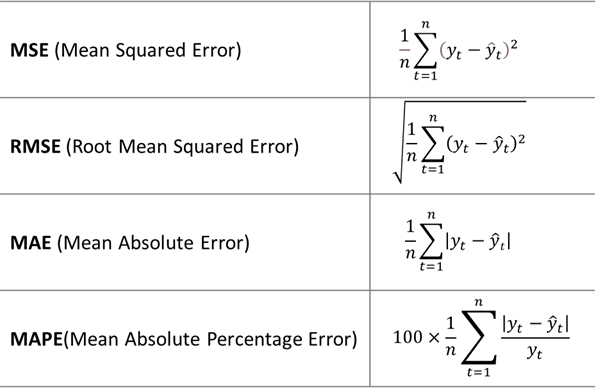


# 분류 모델의 성능 평가 지표

## Accuracy(정확도)

- 실제 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표

- $ 정확도(Accuracy) =  \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수} $

### 정확도 문제 예
1. 타이타닉 생존자 예측
2. MNIST 데이터 세트

### 1. 타이타닉 생존자 예측

- 생존자 예측 Classifier 정의 : BaseEstimator 상속 받음
- 아무런 학습을 하지 않고 성별에 따라 생존자를 예측

In [1]:
# 아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는 
# 단순한 Classifier 생성
# BaseEstimator 상속 받음

import numpy as np
from sklearn.base import BaseEstimator

class MyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 0: #남성
                pred[i] = 1 #사망
            else :
                pred[i] = 0 #생존
        return pred

**MyClassifier를 이용해 타이타닉 생존자 예측 수행**

In [2]:
# 데이터 가공 (타이타닉 생존자 예측 시 작성)

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    # Age, Cabin, Embarked
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    # PassengerId, Name, Ticket
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 
def format_features(df):
    # Cabin 첫문자 추출
    df['Cabin'] = df['Cabin'].str[:1]

    # ['Sex', 'Cabin', 'Embarked']
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_dataFrame(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [3]:
# 타이타닉 생존자 예측 
import pandas as pd

titan_df = pd.read_csv('train.csv')
transform_dataFrame(titan_df)

y=titan_df['Survived']

X = titan_df.drop('Survived', axis=1)


# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
from sklearn.metrics import accuracy_score

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
my_clf = MyClassifier()
my_clf.fit(X_train, y_train)
pred = my_clf.predict(X_test)
accuracy_score(y_test, pred)

0.7821229050279329

In [5]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [6]:
pred[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

### 2. MNIST 데이터 세트
* 사이킷런의 load_digits() API를 통해 MNIST 데이터 세트 제공

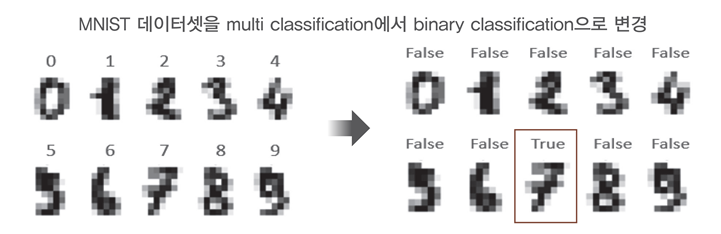

**이진 분류 문제로 변환**

    
**입력되는 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해**


In [7]:
# 모듈 임포트

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

### 정확도 평가 지표의 맹점

- 0으로 예측하는 classifier 정의

In [9]:
# 분류모델 정의
class MyNumClassfier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

**digit 데이터 로드**

In [10]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
digits.data.shape

(1797, 64)

**7인 데이터 확인**

In [13]:
digits.target == 7

array([False, False, False, ..., False, False, False])

**7인 데이터는 1, 그외 데이터는 0으로 변환**

In [14]:
y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

**학습 / 테스트 데이터 세트로 분리 (default = 0.25))**

In [29]:
X_train, X_test, y_train, y_test= train_test_split(digits.data, y, test_size=0.25)

In [30]:
X_test.shape

(450, 64)

In [31]:
X_train.shape

(1347, 64)

In [32]:
y_test.shape

(450,)

In [33]:
y_train.shape

(1347,)

**불균형한 레이블 데이터 분포도 확인**

In [35]:
pd.Series(y_test).value_counts().sort_index()

0    407
1     43
dtype: int64

In [36]:
fake_clf = MyNumClassfier()
fake_clf.fit(X_train, y_train)
pred = fake_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9044444444444445

# Confusion Matrix (오차 행렬)

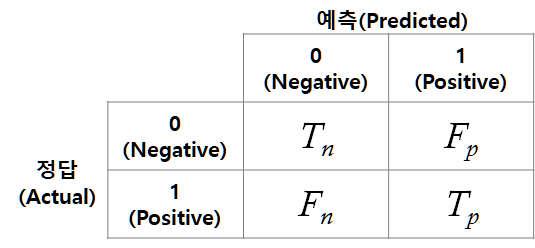

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[407,   0],
       [ 43,   0]])

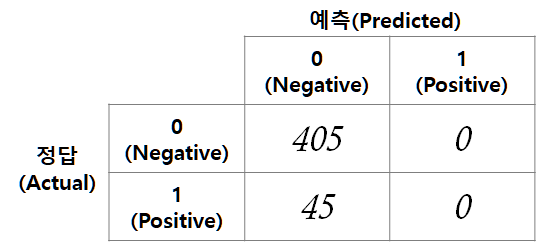

**TN, FP, FN, TP 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보 제공**
- 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Predision), 재현율(Recall) 값을 알 수 있음

### 오차행렬 상에서 정확도

* 정확도(Accuracy) = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수

    $ = \frac{TN + TP}{ TN + FP + FN + TP }$

# 정밀도(Precision)와 재현율(Recall)

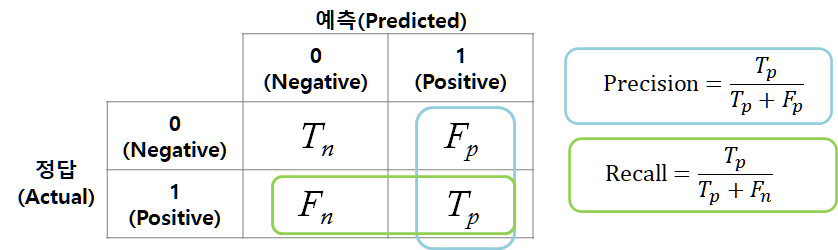

### 정밀도 : TP / (FP + TP)
* Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 
* **양성 예측도**라고도 불림

### 재현율 : TP / (FN + TP)
* 실제값이 Positive인 대상 중 예측과 실제 값이 Positive로 일치한 데이터의 비율
* **민감도(Sensitivity) 또는 TPR(True Positive Rate)**이라고도 불림

### MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print('오차행렬')
    print(confusion)
    print('정확도:{0:.3f}, 정밀도:{1:3f}, 재현률:{2:3f}'.format(accuracy, precision, recall))

- 타이타닉 데이터를 로지스틱 회귀로 분류 수행

In [99]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Null 처리 함수
def fillna(df):
    # Age, Cabin, Embarked
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    # PassengerId, Name, Ticket
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 
def format_features(df):
    # Cabin 첫문자 추출
    df['Cabin'] = df['Cabin'].str[:1]

    # ['Sex', 'Cabin', 'Embarked']
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_dataFrame(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [100]:
# 로지스틱 회귀(LogisticRegression) 기반으로 평가 수행

titan_df = pd.read_csv('train.csv')

df = transform_dataFrame(titan_df)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [101]:
data = df.drop('Survived', axis=1)
data.shape

(891, 8)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(data, df.Survived, test_size=0.3)

### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수

**앞의 타이타닉 데이터 세트 전처리 작업 내**

In [95]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)

get_clf_eval(y_test, pred)

오차행렬
[[153  28]
 [ 24  63]]
정확도:0.806, 정밀도:0.692308, 재현률:0.724138


/opt/homebrew/Caskroom/miniforge/base/envs/mulcam_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
my_clf = MyClassifier()
my_clf.fit(X_train, y_train)
pred = my_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차행렬
[[152  26]
 [ 30  60]]
정확도:0.791, 정밀도:0.697674, 재현률:0.666667


## Precision/Recall Trade-off

**정밀도 / 재현율 트레이드 오프(Trade-off)**
* 정밀도와 재현율은 상호 보완적인 평가 지표로서 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지는데 이를 정밀도/재현율의 트레이드 오프라고 함

### predict_proba( ) 메소드

In [105]:
pred = LR.predict(X_test)
pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1])

In [106]:
pred_proba = LR.predict_proba(X_test)
pred_proba

array([[0.31589549, 0.68410451],
       [0.55286537, 0.44713463],
       [0.85895712, 0.14104288],
       [0.31864489, 0.68135511],
       [0.87953629, 0.12046371],
       [0.87192105, 0.12807895],
       [0.25023085, 0.74976915],
       [0.90211173, 0.09788827],
       [0.24678804, 0.75321196],
       [0.87950164, 0.12049836],
       [0.87950373, 0.12049627],
       [0.24002793, 0.75997207],
       [0.85898582, 0.14101418],
       [0.31061491, 0.68938509],
       [0.8459367 , 0.1540633 ],
       [0.89158831, 0.10841169],
       [0.41296575, 0.58703425],
       [0.80028222, 0.19971778],
       [0.34696804, 0.65303196],
       [0.39667329, 0.60332671],
       [0.71440486, 0.28559514],
       [0.19455381, 0.80544619],
       [0.83014136, 0.16985864],
       [0.82652116, 0.17347884],
       [0.91846365, 0.08153635],
       [0.0373266 , 0.9626734 ],
       [0.35769842, 0.64230158],
       [0.87950373, 0.12049627],
       [0.4395382 , 0.5604618 ],
       [0.85902981, 0.14097019],
       [0.

In [111]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
pred_proba_result

array([[0.31589549, 0.68410451, 1.        ],
       [0.55286537, 0.44713463, 0.        ],
       [0.85895712, 0.14104288, 0.        ],
       [0.31864489, 0.68135511, 1.        ],
       [0.87953629, 0.12046371, 0.        ],
       [0.87192105, 0.12807895, 0.        ],
       [0.25023085, 0.74976915, 1.        ],
       [0.90211173, 0.09788827, 0.        ],
       [0.24678804, 0.75321196, 1.        ],
       [0.87950164, 0.12049836, 0.        ],
       [0.87950373, 0.12049627, 0.        ],
       [0.24002793, 0.75997207, 1.        ],
       [0.85898582, 0.14101418, 0.        ],
       [0.31061491, 0.68938509, 1.        ],
       [0.8459367 , 0.1540633 , 0.        ],
       [0.89158831, 0.10841169, 0.        ],
       [0.41296575, 0.58703425, 1.        ],
       [0.80028222, 0.19971778, 0.        ],
       [0.34696804, 0.65303196, 1.        ],
       [0.39667329, 0.60332671, 1.        ],
       [0.71440486, 0.28559514, 0.        ],
       [0.19455381, 0.80544619, 1.        ],
       [0.

### Binarizer 클래스 활용

분류 결정 임계값을 조절

In [112]:
from sklearn.preprocessing import Binarizer

x = [[0.5, -1, 2],
[2, 0, -3],
[0, 1.3, 1.5]]

binar = Binarizer(threshold=1.5)

In [114]:
binar.fit_transform(x)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [115]:
c_threshold = 0.5

In [124]:
pred_p = pred_proba[:, 1].reshape(-1,1)
bina = Binarizer(threshold=c_threshold).fit(pred_p)

In [127]:
result = bina.transform(pred_p)
result

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [128]:
get_clf_eval(y_test, result)

오차행렬
[[149  29]
 [ 27  63]]
정확도:0.791, 정밀도:0.684783, 재현률:0.700000


**분류 결정 임계값을 0.4로 변경**

In [130]:
c_threshold = 0.4

In [131]:
pred_p = pred_proba[:, 1].reshape(-1,1)
bina = Binarizer(threshold=c_threshold).fit(pred_p)

In [132]:
result = bina.transform(pred_p)
get_clf_eval(y_test, result)

오차행렬
[[140  38]
 [ 20  70]]
정확도:0.784, 정밀도:0.648148, 재현률:0.777778


**여러개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 변환**

In [134]:
thresholds = [0.3, 0.45, 0.6, 0.75, 0.9]

def get_eval_by_thresholds(y_test, pred_p, thresholds):
    for c in thresholds:
        bina = Binarizer(threshold=c)
        bina.fit(pred_p)
        result = bina.transform(pred_p)

        get_clf_eval(y_test, result)

In [135]:
get_eval_by_thresholds(y_test, pred_p, thresholds)

오차행렬
[[130  48]
 [ 17  73]]
정확도:0.757, 정밀도:0.603306, 재현률:0.811111
오차행렬
[[145  33]
 [ 25  65]]
정확도:0.784, 정밀도:0.663265, 재현률:0.722222
오차행렬
[[159  19]
 [ 31  59]]
정확도:0.813, 정밀도:0.756410, 재현률:0.655556
오차행렬
[[173   5]
 [ 53  37]]
정확도:0.784, 정밀도:0.880952, 재현률:0.411111
오차행렬
[[177   1]
 [ 74  16]]
정확도:0.720, 정밀도:0.941176, 재현률:0.177778


### 임곗값에 따른 정밀도-재현율 값 추출

**precision_recall_curve( 실제값, 레이블 값이 1일 때의 예측 확률값)**
- 정밀도, 재현율, 임계값을 ndarray로 반환
- 임계값 : 일반적으로 0.11~0.95 범위
- 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용

### 예제

In [137]:
from sklearn.metrics import precision_recall_curve

pred_proba1 = LR.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba1)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, pred_proba1)
print('roc auc값', roc_auc)

roc auc값 0.8485642946317103


In [140]:
print(precisions)
print(recalls)
print(thresholds)

[0.34351145 0.34099617 0.34230769 0.34362934 0.34496124 0.3463035
 0.34765625 0.34901961 0.3503937  0.35177866 0.3531746  0.35458167
 0.356      0.35742972 0.35887097 0.36032389 0.36178862 0.36326531
 0.3647541  0.36625514 0.3677686  0.36929461 0.36666667 0.36820084
 0.3697479  0.37130802 0.37288136 0.37446809 0.37606838 0.3776824
 0.37931034 0.38095238 0.3826087  0.37991266 0.38157895 0.37885463
 0.38053097 0.38222222 0.38392857 0.39090909 0.39631336 0.39814815
 0.4        0.40186916 0.40375587 0.40566038 0.40758294 0.40952381
 0.41148325 0.41346154 0.41062802 0.40776699 0.4097561  0.41176471
 0.41791045 0.42       0.42211055 0.41919192 0.4213198  0.42346939
 0.42564103 0.42783505 0.43005181 0.43229167 0.43455497 0.43684211
 0.43915344 0.44148936 0.44385027 0.44086022 0.44324324 0.44565217
 0.44808743 0.45054945 0.45303867 0.45555556 0.45810056 0.46067416
 0.46327684 0.46857143 0.47126437 0.46820809 0.47093023 0.47368421
 0.47647059 0.47928994 0.48214286 0.48502994 0.48795181 0.490909

In [142]:
print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)

(251,)
(251,)
(250,)


In [144]:
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print(np.round(thresholds[thr_index], 2))

print(np.round(precisions[thr_index], 3))
print(np.round(recalls[thr_index], 3))

[  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210 225 240]
[0.07 0.09 0.1  0.11 0.13 0.14 0.15 0.17 0.24 0.32 0.45 0.56 0.65 0.68
 0.76 0.83 0.94]
[0.344 0.36  0.379 0.406 0.426 0.456 0.497 0.537 0.557 0.617 0.66  0.718
 0.8   0.855 0.9   0.96  1.   ]
[1.    0.989 0.978 0.956 0.922 0.911 0.9   0.878 0.811 0.789 0.733 0.678
 0.622 0.522 0.4   0.267 0.111]


### 임곗값의 변경에 따른 정밀도-재현율 변화 곡선

In [157]:
import matplotlib.pyplot as plt

def precision_recall_curve_plot(y_test, pred_proba1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba1)
    plt.figure(figsize = (8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precisions')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Thresholds value')
    plt.ylabel('Precision vs Recall')
    plt.legend()
    plt.grid()
    plt.show()

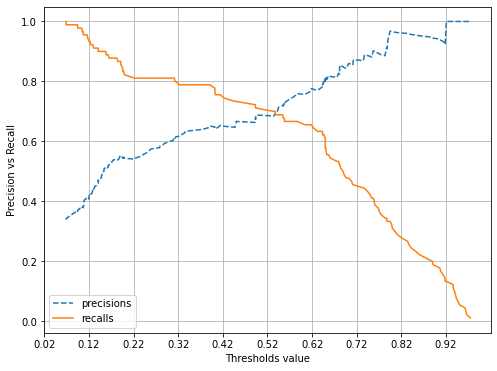

In [158]:
precision_recall_curve_plot(y_test, pred_proba1)

# F1 Score

### F1 Score
- 정밀도와 재현율의 조화평균

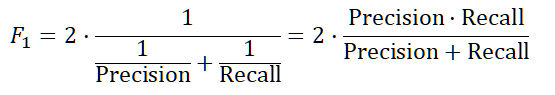

### 예 : 두 예측 모델 비교  
A 예측 모델
- 정밀도 : 0.9
- 재현율 : 0.1 (극단적 차이)
- F1 스코어 : 0.18

B 예측 모델
- 정밀도 : 0.5
- 재현율 : 0.5 (큰 차이 없음)
- F1 스코어 : 0.5 

B모델의 FI 스코어가 A모델에 비해 매우 우수

In [160]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print(f1)

0.6923076923076924


### 타이타닉 생존자 예측에서 F1 스코어
- 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기
- 임계값 0.4~0.6별로 정확도, 정밀도, 재현율, F1 스코어 확인

In [161]:
def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred)

    acc=accuracy_score(y_test, pred)

    precision = precision_score(y_test, pred)

    recall = recall_score(y_test, pred)

    f1 = f1_score(y_test, pred)

    print('오차행렬')
    print(confusion)
    print('정확도:{0:.3f}, 정밀도:{1:3f}, 재현률:{2:3f}, f1점수:{3:3f}'.format(acc, precision, recall, f1))

In [162]:
get_clf_eval(y_test, pred)

오차행렬
[[149  29]
 [ 27  63]]
정확도:0.791, 정밀도:0.684783, 재현률:0.700000, f1점수:0.692308


In [169]:
thres = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = LR.predict_proba(X_test)[:, 1].reshape(-1,1)
get_eval_by_thresholds(y_test, pred_proba, thres)

오차행렬
[[140  38]
 [ 20  70]]
정확도:0.784, 정밀도:0.648148, 재현률:0.777778, f1점수:0.707071
오차행렬
[[145  33]
 [ 25  65]]
정확도:0.784, 정밀도:0.663265, 재현률:0.722222, f1점수:0.691489
오차행렬
[[149  29]
 [ 27  63]]
정확도:0.791, 정밀도:0.684783, 재현률:0.700000, f1점수:0.692308
오차행렬
[[154  24]
 [ 28  62]]
정확도:0.806, 정밀도:0.720930, 재현률:0.688889, f1점수:0.704545
오차행렬
[[159  19]
 [ 31  59]]
정확도:0.813, 정밀도:0.756410, 재현률:0.655556, f1점수:0.702381


# G measure

- 정밀도와 재현율의 기하평균

- $ G = \sqrt{Precision × Recall}$

In [ ]:
from sklearn.metrics import 

In [171]:
def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred)
    acc=accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    Gmeasure = np.sqrt(precision*recall)

    print('오차행렬')
    print(confusion)
    print('정확도:{0:.3f}, 정밀도:{1:3f}, 재현률:{2:3f}, f1점수:{3:3f}, G measure:{4:3f}'.format(acc, precision, recall, f1, Gmeasure))

In [172]:
thres = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = LR.predict_proba(X_test)[:, 1].reshape(-1,1)
get_eval_by_thresholds(y_test, pred_proba, thres)

오차행렬
[[140  38]
 [ 20  70]]
정확도:0.784, 정밀도:0.648148, 재현률:0.777778, f1점수:0.707071, G measure:0.710011
오차행렬
[[145  33]
 [ 25  65]]
정확도:0.784, 정밀도:0.663265, 재현률:0.722222, f1점수:0.691489, G measure:0.692116
오차행렬
[[149  29]
 [ 27  63]]
정확도:0.791, 정밀도:0.684783, 재현률:0.700000, f1점수:0.692308, G measure:0.692349
오차행렬
[[154  24]
 [ 28  62]]
정확도:0.806, 정밀도:0.720930, 재현률:0.688889, f1점수:0.704545, G measure:0.704727
오차행렬
[[159  19]
 [ 31  59]]
정확도:0.813, 정밀도:0.756410, 재현률:0.655556, f1점수:0.702381, G measure:0.704180


# ROC Curve와 AUC

### ROC(Reciver Operating Characteristic)

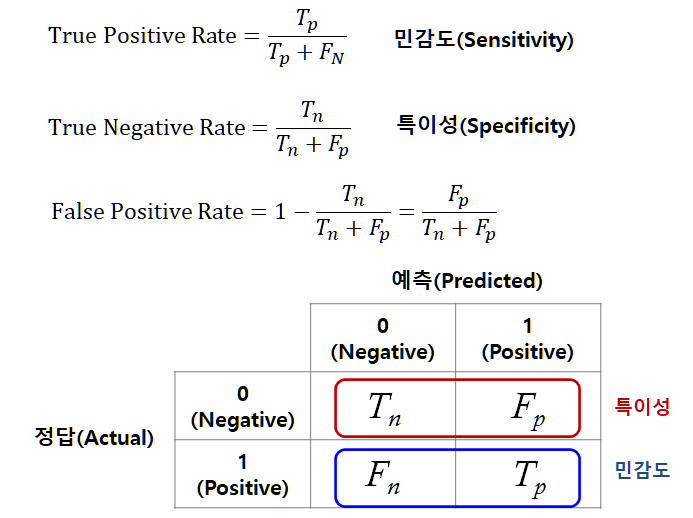

https://hsm-edu.tistory.com/1033

### AUC(Area Under the Curve)
- ROC 곡선 아래 면적
- 대각선의 직선에 대응되면 AUC는 0.5
- 1에 가까울수록 좋은 수치
- FPR이 작을 때 얼마나 큰 TPR을 얻는지에 따라 결정

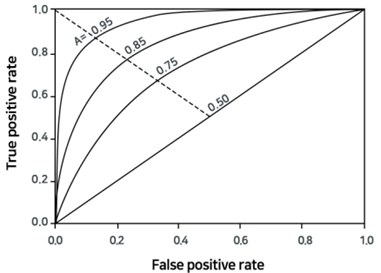

In [178]:
from sklearn.metrics import roc_curve

pred_proba1 = LR.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba1)

fprs.shape

(91,)

In [180]:
idx = np.arange(1, thresholds.shape[0], 5)

print('fprs :', np.round(fprs[idx], 3))
print('tprs :', np.round(tprs[idx], 3))
print('thresholds :', np.round(thresholds[idx], 3))

fprs : [0.    0.017 0.034 0.045 0.067 0.079 0.107 0.135 0.174 0.202 0.258 0.354
 0.41  0.472 0.584 0.674 0.775 0.854]
tprs : [0.011 0.344 0.444 0.522 0.556 0.622 0.656 0.689 0.711 0.756 0.8   0.867
 0.878 0.9   0.911 0.933 0.956 0.978]
thresholds : [0.974 0.787 0.735 0.682 0.653 0.646 0.603 0.554 0.493 0.415 0.312 0.191
 0.165 0.15  0.131 0.12  0.108 0.095]


In [ ]:
# 타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC 값 확인


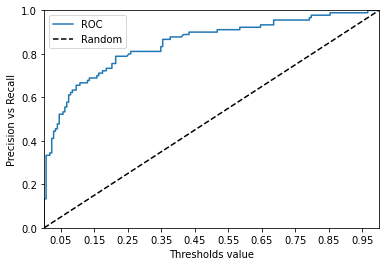

In [186]:
def roc_curve_plot(y_test, pred_proba_c1):

    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    plt.plot(fprs, tprs, label='ROC')

    plt.plot([0, 1], [0,1], 'k--', label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.xlabel('Thresholds value')
    plt.ylabel('Precision vs Recall')
    plt.legend()
    plt.show()

pred_proba1 = LR.predict_proba(X_test)[:, 1]
roc_curve_plot(y_test, pred_proba1)

In [183]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, pred_proba1)
print('roc auc값', roc_auc)

roc auc값 0.8485642946317103


In [184]:
def get_clf_eval():
    pass